In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf 
import warnings

warnings.filterwarnings('ignore')

In [2]:
#read csv file
Amtrak = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Amtrak.csv")
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [3]:
Amtrak1 = Amtrak.copy()
Amtrak1

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964
...,...,...
154,01/11/2003,2076.054
155,01/12/2003,2140.677
156,01/01/2004,1831.508
157,01/02/2004,1838.006


In [4]:
Amtrak1["t"] = np.arange(1,160)
Amtrak1["t_squared"] = Amtrak1["t"]*Amtrak1["t"]
Amtrak1.columns

Index(['Month', 'Ridership', 't', 't_squared'], dtype='object')

<AxesSubplot:>

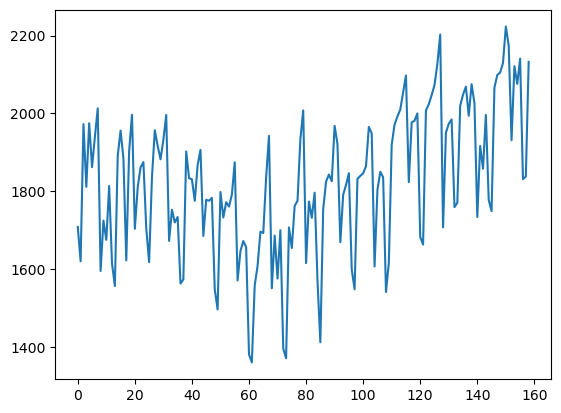

In [5]:
Amtrak1.rename(columns={"Ridership ": 'Riderships'}, inplace=True)

Amtrak1["log_Rider"] = np.log(Amtrak1[Amtrak1.columns[1]])
Amtrak1.Ridership.plot()

In [6]:
Amtrak1.head()

,Month,Ridership,t,t_squared,log_Rider
0,01/01/1991,1708.917,1,1,7.443615
1,01/02/1991,1620.586,2,4,7.390543
2,01/03/1991,1972.715,3,9,7.587166
3,01/04/1991,1811.665,4,16,7.502002
4,01/05/1991,1974.964,5,25,7.588305


In [7]:
Amtrak1["Date"] = pd.to_datetime(Amtrak1.Month,format="%d/%m/%Y")

Amtrak1["month"] = Amtrak1.Date.dt.strftime("%b") # month extraction
Amtrak1["year"] = Amtrak1.Date.dt.strftime("%Y") # year extraction
Amtrak1.head()

,Month,Ridership,t,t_squared,log_Rider,Date,month,year
0,01/01/1991,1708.917,1,1,7.443615,1991-01-01,Jan,1991
1,01/02/1991,1620.586,2,4,7.390543,1991-02-01,Feb,1991
2,01/03/1991,1972.715,3,9,7.587166,1991-03-01,Mar,1991
3,01/04/1991,1811.665,4,16,7.502002,1991-04-01,Apr,1991
4,01/05/1991,1974.964,5,25,7.588305,1991-05-01,May,1991


In [8]:
from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(sparse=False)
OHE.fit(Amtrak1[['month']])
value=OHE.transform(Amtrak1[['month']])
x=[[0,0,0,0,0,0,0,0,0,0,0,0]]
labels=[]
for i in range(12):
    x[0][i]=1
    labels.append(OHE.inverse_transform(x)[0][0])
    x[0][i]=0
    
ohe=pd.DataFrame(value,columns=labels)
am2=pd.concat((Amtrak1,ohe),join='outer',axis=1)
am2.head()


,Month,Ridership,t,t_squared,log_Rider,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01/01/1991,1708.917,1,1,7.443615,1991-01-01,Jan,1991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/02/1991,1620.586,2,4,7.390543,1991-02-01,Feb,1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/03/1991,1972.715,3,9,7.587166,1991-03-01,Mar,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,01/04/1991,1811.665,4,16,7.502002,1991-04-01,Apr,1991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/05/1991,1974.964,5,25,7.588305,1991-05-01,May,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


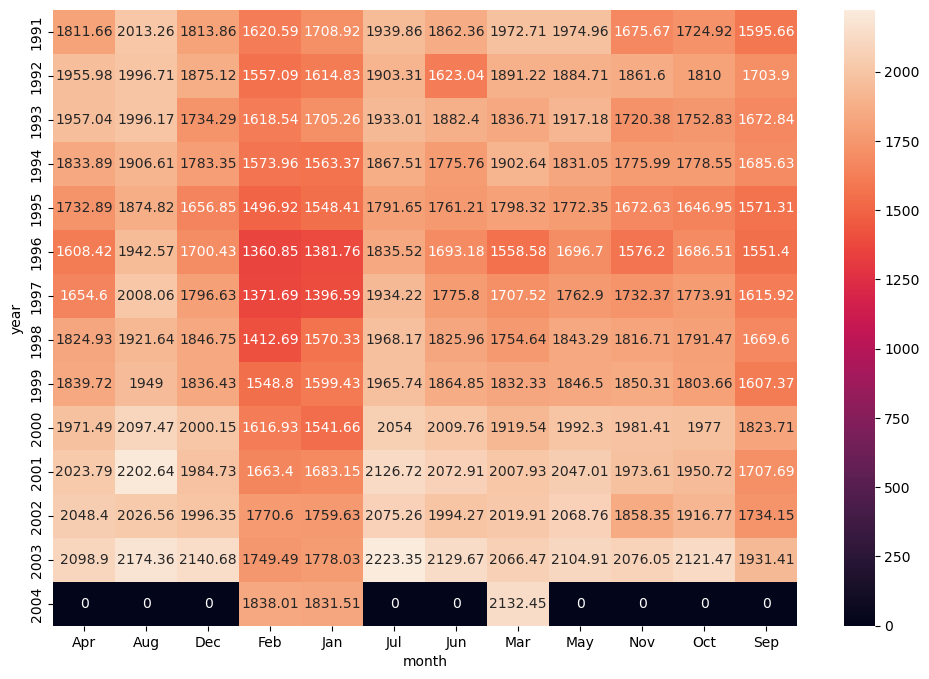

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=am2,values="Ridership",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

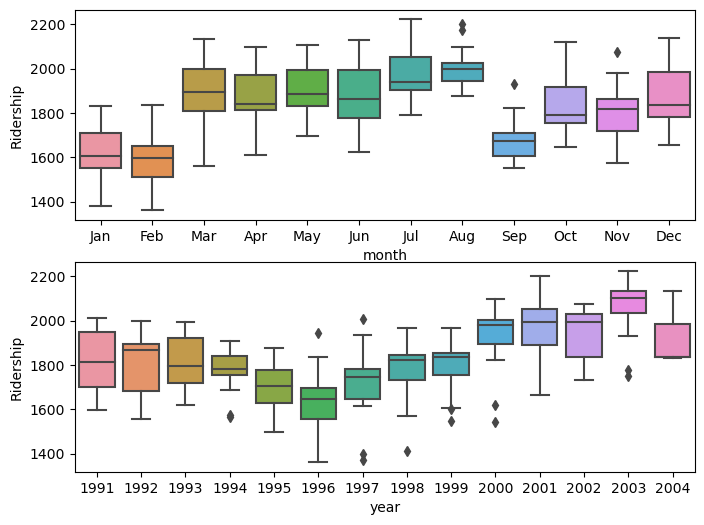

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Ridership",data=am2)
plt.subplot(212)
sns.boxplot(x="year",y="Ridership",data=am2)
plt.show()


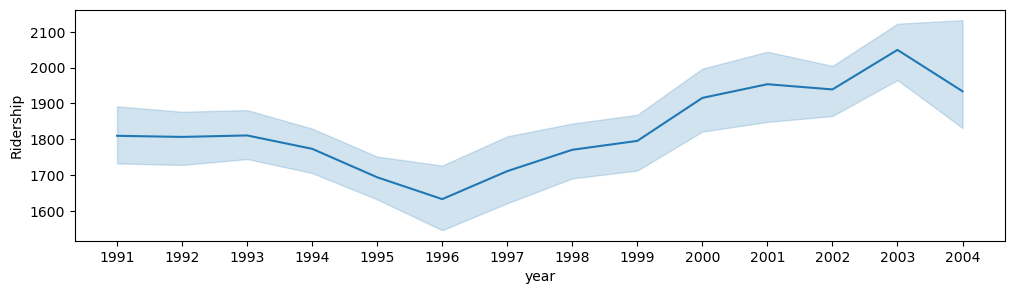

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Ridership",data=am2)
plt.show()

In [12]:
Train = am2.head(147)
Test = am2.tail(12)

In [13]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

#LINEAR 
linear_model = smf.ols('Ridership~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_linear))**2))
rmse_linear

210.02515729100517

In [14]:
#Exponential
Exp = smf.ols('log_Rider~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.15074056106508

In [15]:
#Quadratic
Quad = smf.ols('Ridership~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_Quad))**2))
rmse_Quad

137.24932426547528

In [16]:
Train.head()

,Month,Ridership,t,t_squared,log_Rider,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01/01/1991,1708.917,1,1,7.443615,1991-01-01,Jan,1991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/02/1991,1620.586,2,4,7.390543,1991-02-01,Feb,1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/03/1991,1972.715,3,9,7.587166,1991-03-01,Mar,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,01/04/1991,1811.665,4,16,7.502002,1991-04-01,Apr,1991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/05/1991,1974.964,5,25,7.588305,1991-05-01,May,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
#Additive seasonality

add_sea = smf.ols('Ridership~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.7650968253982

In [18]:
# Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Ridership~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

50.59855425535122

In [19]:
# Multiplicative Seasonality

Mul_sea = smf.ols('log_Rider~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.2990908889071

In [20]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Rider~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.8090427478893

In [21]:
# Testing
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,210.025157
1,rmse_Exp,217.150741
2,rmse_Quad,137.249324
3,rmse_add_sea,264.765097
4,rmse_add_sea_quad,50.598554
5,rmse_Mult_sea,268.299091
6,rmse_Mult_add_sea,172.809043
